<a href="https://colab.research.google.com/github/simranvanjani/Personal-projects/blob/main/Abalone_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
colname = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']

In [ ]:
df = read_csv("abalone.data", sep =',' , names=colname)
df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#data analysis

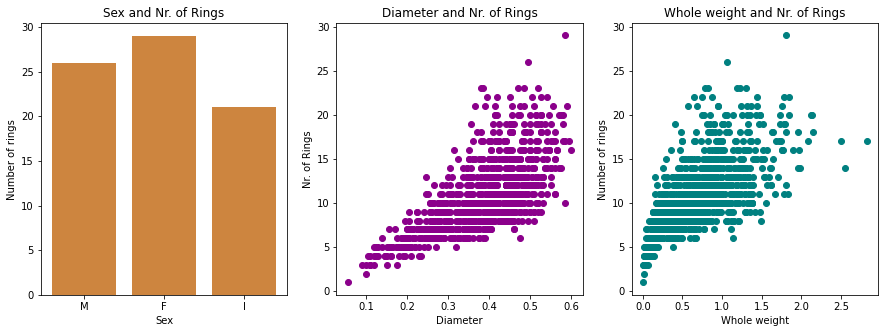

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5)) 
ax1.bar(df["sex"][:1000], df["rings"][:1000], color="peru")
ax1.set(title="Sex and Nr. of Rings", 
       xlabel="Sex",
       ylabel="Number of rings")
      
ax2.scatter(df["diameter"][:1000], df["rings"][:1000], color="darkmagenta")
ax2.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings")

ax3.scatter(df["whole weight"][:1000], df["rings"][:1000], color="teal")
ax3.set(title="Whole weight and Nr. of Rings",
       xlabel="Whole weight",
       ylabel="Number of rings");      

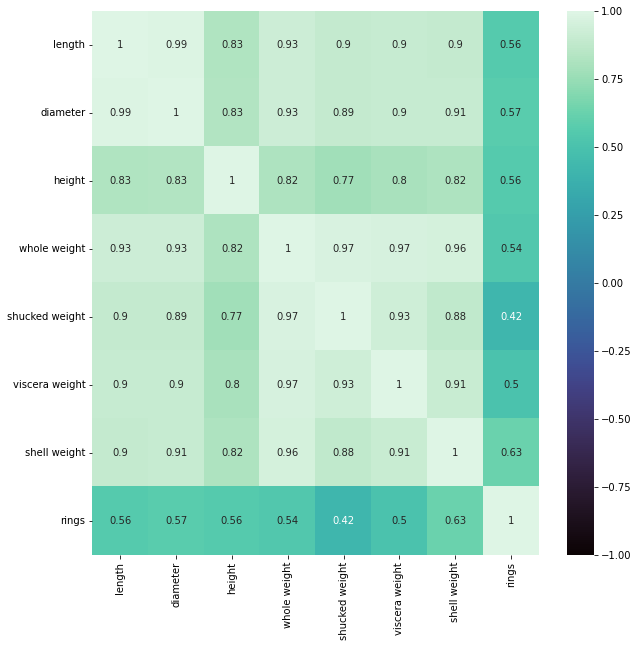

In [ ]:
corr = df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True, cmap = 'mako')

#Data preparation 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

sex


In [ ]:
dfonehot = pd.get_dummies(df, 'sex')
dfonehot.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [ ]:
dfonehot.isna().sum()

length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
sex_F             0
sex_I             0
sex_M             0
dtype: int64

scaling

In [ ]:
dfonehot.columns

Index(['length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings', 'sex_F', 'sex_I', 'sex_M'],
      dtype='object')

#Data Modelling

In [ ]:
dfonehot["age"] = dfonehot["rings"] + 1.5
dfonehot.drop("rings", axis=1, inplace=True)
dfonehot.head(10)
x = dfonehot.drop("age", axis=1)
y = dfonehot["age"]
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=14)


In [ ]:
dfonehot.head(10)

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,sex_F,sex_I,sex_M,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,8.5
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0,1,0,9.5
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,1,0,0,21.5
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,1,0,0,17.5
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,0,0,1,10.5
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,1,0,0,20.5


#Linear Model

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
print(r2_score(y_train, model.predict(x_train)))
print(r2_score(y_test, model.predict(x_test)))


0.5451207611106967
0.4853753917304361


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, #n_jobs=-1 means that we are using all computer power to fit the model
                           random_state=14)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(r2_score(y_train, rf.predict(x_train)))
print(r2_score(y_test, pred))

0.9354110512905737
0.5289839132893989


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
print(r2_score(y_train, tree_model.predict(x_train)))
print(r2_score(y_test, tree_model.predict(x_test)))

1.0
0.08014923330805235


#Hyperparameter Tuning

In [ ]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 14, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":[20, 100, 200],
           "max_depth":[None, 1, 2, 5],
           "max_features":[0.5, 1, "auto", "sqrt"],
           "min_samples_split":[ 2, 5, 10],
           "min_samples_leaf":[1, 2, 3, 5]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=14),
                              param_distributions=rf_grid, 
                              n_iter=100, # n_iter = 100 means that the model will fit 100 for different combinations of parameters
                              cv=5, # number of cross-validation folds for each set of parameters
                              verbose=True) # requesting more elaborate output in the log

rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=14),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 1, 2, 5],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 100, 200]},
                   verbose=True)

In [ ]:
rs_model.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
ideal_model = RandomForestRegressor(max_depth=None,
                                    max_features=0.5,
                                    min_samples_leaf=5,
                                    min_samples_split=5,
                                    n_estimators=200)
# Fit the ideal model
ideal_model.fit(x_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=200)

In [ ]:
print(r2_score(y_train, ideal_model.predict(x_train)))
print(r2_score(y_test, ideal_model.predict(x_test)))

0.765565472695471
0.5654614268493025


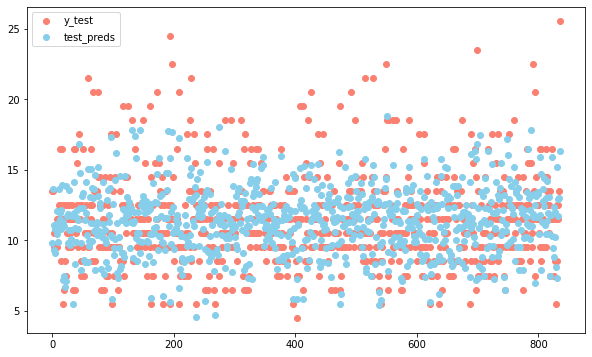

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), preds, color="skyblue", label="test_preds")
plt.legend();